# Statistics

I intend to use the titanic dataset from seaborn to demonstrate the difference and applications of a **Probability Mass Function** and **Probability Density Function**.

In [1]:
# scipy - scientific python. A library used to do statistical calculation
from scipy.stats import norm

## PMF
The PMF(Probability Mass Function) is used to describe probabilities of a discrete random variable

In [2]:
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
count_numbers = collections.Counter(x)
count_numbers

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})

In [3]:
import random
x = []
for v in range(13):
    x.append(random.randrange(1,5,1))
print(x)

[3, 4, 2, 2, 4, 4, 1, 3, 1, 4, 4, 4, 3]


In [4]:
import matplotlib.pyplot as plt

In [5]:
outcomes = count_numbers.keys()
outcomes

dict_keys([1, 2, 3, 4, 5])

In [6]:
def p(x_i):
    frequency = count_numbers[x_i]
    total = len(x)
    return frequency/total

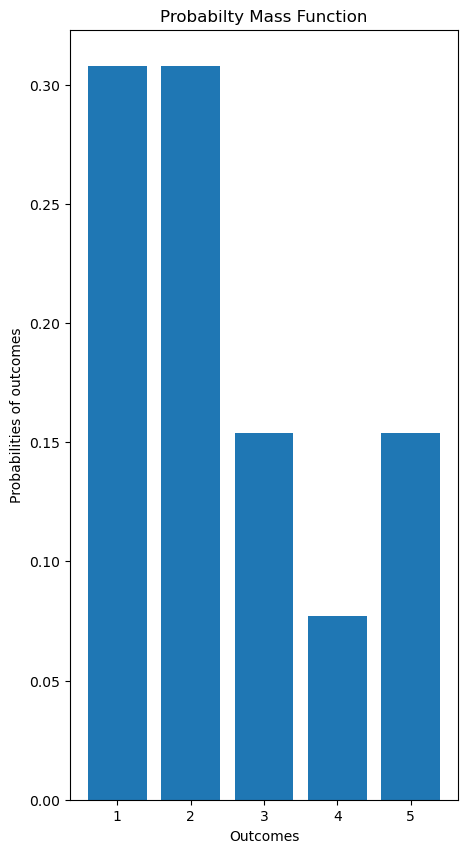

In [7]:
fig , ax = plt.subplots(figsize = (5,10))
ax.bar(outcomes,[p(x_i) for x_i in outcomes])
ax.set_title("Probabilty Mass Function")
ax.set_xlabel("Outcomes")
ax.set_ylabel("Probabilities of outcomes");

### Calculate the PMF for surviving in the Titanic Tragedy

In [8]:
import seaborn as sns
import pandas as pd

In [9]:
# load the titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [10]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
survival = titanic['survived'].value_counts()

In [12]:
survivors = survival[1]
non_survivors = survival[0]
total_passengers = survival.sum()
print(f"""The total number of passengers in the Titanic was {total_passengers}. 
The number of survivors was {survivors} meaning the deaths were {non_survivors}""")

The total number of passengers in the Titanic was 891. 
The number of survivors was 342 meaning the deaths were 549


In [13]:
pmf_survival = survival/total_passengers
pmf_survival

survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [14]:
print(f'''From the above result, the probabilty of surviving in the Titanic tragedy is {pmf_survival[1]}.''')

From the above result, the probabilty of surviving in the Titanic tragedy is 0.3838383838383838.


In [15]:
pmf_survival.index = ['not_survive','survive']
pmf_survival

not_survive    0.616162
survive        0.383838
Name: count, dtype: float64

In [16]:
df = pd.DataFrame(pmf_survival).reset_index()
df

,index,count
0,not_survive,0.616162
1,survive,0.383838


In [17]:
df.rename(columns = {"count":"PMF","index":'variable'},inplace = True)
df

,variable,PMF
0,not_survive,0.616162
1,survive,0.383838


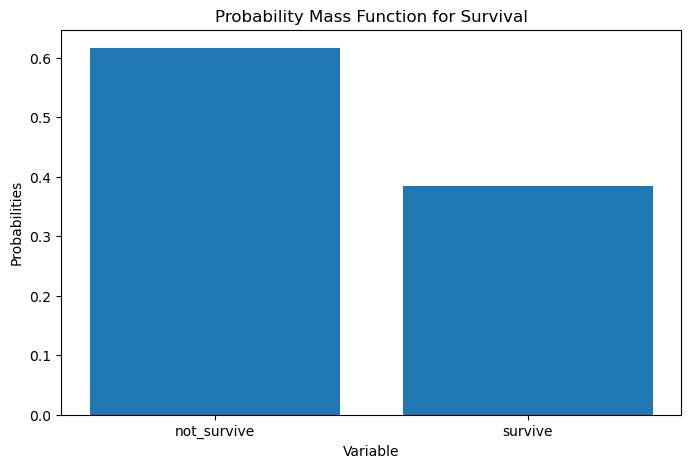

In [18]:
# plot the PMF
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(df['variable'],df['PMF'])
ax.set_title('Probability Mass Function for Survival')
ax.set_ylabel('Probabilities')
ax.set_xlabel('Variable');

## PDF
The PDF(Probability Density Function) is used in calculating the probability of a continuous random variable

In [19]:
df2 = titanic[['age','survived']].dropna()
df2.head()

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


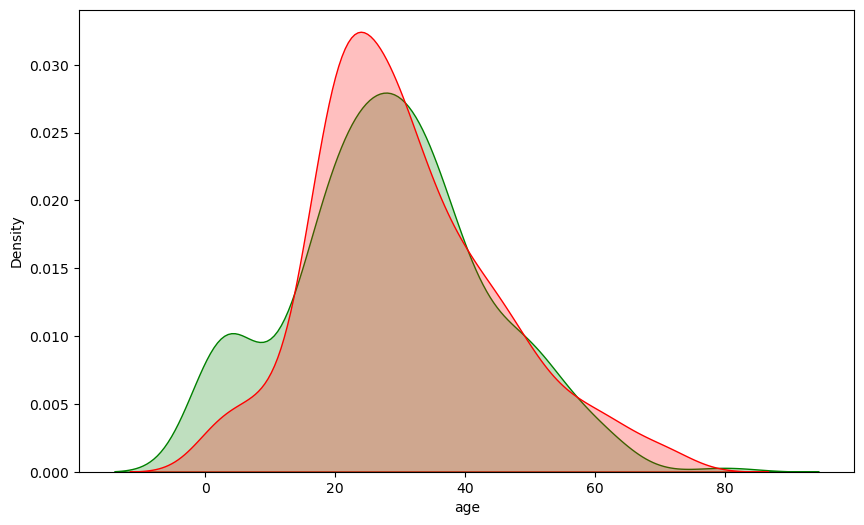

In [20]:
#plot the kernal density plot to show the age of both groups
fig, ax = plt.subplots(figsize = (10,6))
sns.kdeplot(data = df2[df2['survived'] == 1]['age'], fill = True, label = 'survived', color = 'green')
sns.kdeplot(data = df2[df2['survived'] == 0]['age'], fill = True, label = 'survived', color = 'red');

In [21]:
age_min, age_max = 20,40
filtered_df = df2[(df2['age']>=age_min) & (df2['age']<=age_max)]
filtered_df.head()

,age,survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [22]:
survived_df = filtered_df[filtered_df['survived']==1]
survived_df.head()

,age,survived
1,38.0,1
2,26.0,1
3,35.0,1
8,27.0,1
21,34.0,1


In [23]:
not_survived_df = filtered_df[filtered_df['survived']==0]
not_survived_df.head()

,age,survived
0,22.0,0
4,35.0,0
12,20.0,0
13,39.0,0
18,31.0,0


In [29]:
import scipy.stats

In [30]:
kde_survived = scipy.stats.gaussian_kde(survived_df['age'])

In [31]:
kde_not_survived = scipy.stats.gaussian_kde(not_survived_df["age"])

In [33]:
# To show the probaility of surviving for different ages is demonstrated below
for age, probability in zip(survived_df['age'],kde_survived(survived_df['age'])):
    print(f" Age: {age} - prob: {probability}")

 Age: 38.0 - prob: 0.03248130176385932
 Age: 26.0 - prob: 0.053888194588115806
 Age: 35.0 - prob: 0.04825100034412311
 Age: 27.0 - prob: 0.053590792888868324
 Age: 34.0 - prob: 0.05055238254720975
 Age: 28.0 - prob: 0.053787958841756356
 Age: 38.0 - prob: 0.03248130176385932
 Age: 29.0 - prob: 0.05418192917772436
 Age: 21.0 - prob: 0.033795841998932895
 Age: 38.0 - prob: 0.03248130176385932
 Age: 29.0 - prob: 0.05418192917772436
 Age: 32.0 - prob: 0.05282512548932362
 Age: 30.0 - prob: 0.054281675953807236
 Age: 29.0 - prob: 0.05418192917772436
 Age: 33.0 - prob: 0.05178219329651879
 Age: 23.0 - prob: 0.05024247968279977
 Age: 23.0 - prob: 0.05024247968279977
 Age: 34.0 - prob: 0.05055238254720975
 Age: 21.0 - prob: 0.033795841998932895
 Age: 32.5 - prob: 0.05230046322099842
 Age: 24.0 - prob: 0.053615169654382976
 Age: 29.0 - prob: 0.05418192917772436
 Age: 22.0 - prob: 0.04342086982931941
 Age: 24.0 - prob: 0.053615169654382976
 Age: 27.0 - prob: 0.053590792888868324
 Age: 22.0 - pro

In [34]:
# To show the probaility of not surviving for different ages is demonstrated below
for age, probability in zip(not_survived_df['age'],kde_not_survived(not_survived_df['age'])):
    print(f" Age: {age} - prob: {probability}")

 Age: 22.0 - prob: 0.05588161712157624
 Age: 35.0 - prob: 0.03593799347065193
 Age: 20.0 - prob: 0.037819021595753226
 Age: 39.0 - prob: 0.02397604674758244
 Age: 31.0 - prob: 0.048055496306574
 Age: 35.0 - prob: 0.03593799347065193
 Age: 40.0 - prob: 0.01838276142800467
 Age: 28.0 - prob: 0.05506411298046218
 Age: 21.0 - prob: 0.04905902431471325
 Age: 40.0 - prob: 0.01838276142800467
 Age: 27.0 - prob: 0.055063749512475293
 Age: 21.0 - prob: 0.04905902431471325
 Age: 28.5 - prob: 0.0549225219529391
 Age: 22.0 - prob: 0.05588161712157624
 Age: 26.0 - prob: 0.055751644592576234
 Age: 32.0 - prob: 0.04384846920791423
 Age: 21.0 - prob: 0.04905902431471325
 Age: 26.0 - prob: 0.055751644592576234
 Age: 25.0 - prob: 0.057221423720740835
 Age: 22.0 - prob: 0.05588161712157624
 Age: 28.0 - prob: 0.05506411298046218
 Age: 24.0 - prob: 0.05851324729812316
 Age: 29.0 - prob: 0.054427498159033555
 Age: 20.0 - prob: 0.037819021595753226
 Age: 26.0 - prob: 0.055751644592576234
 Age: 34.0 - prob: 0